<a href="https://colab.research.google.com/github/wahid028/Deep-Learning-with-TF2.0/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
#load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
#load the data
data = load_breast_cancer()

In [5]:
#check the type of the data
type(data)

sklearn.utils.Bunch

In [6]:
#note it is a Bunch object
#this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
#'data' the attributes means the input data
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
#normally we would put all of our imports at the top
#but this lets us tell a story
from sklearn.model_selection import train_test_split

#split the data into train and test sets
#this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
#scale the data | normalization the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
#build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#alternative code
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#evaluation the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 30ms/step - loss: 0.7201 - accuracy: 0.5302 - val_loss: 0.6587 - val_accuracy: 0.6383
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.6115 - val_loss: 0.6028 - val_accuracy: 0.7021
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5999 - accuracy: 0.6772 - val_loss: 0.5555 - val_accuracy: 0.7553
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 0.5517 - accuracy: 0.7165 - val_loss: 0.5150 - val_accuracy: 0.7872
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5111 - accuracy: 0.7585 - val_loss: 0.4800 - val_accuracy: 0.8032
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4750 - accuracy: 0.7900 - val_loss: 0.4507 - val_accuracy: 0.8351
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.4447 - accuracy: 0.8163 - val_loss: 0.4248 - val_accuracy: 0.8404
Epoch 8/1

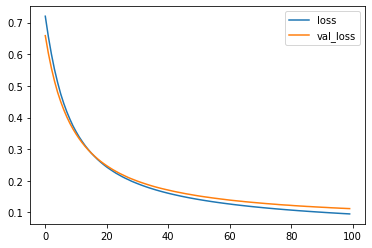

In [18]:
#plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

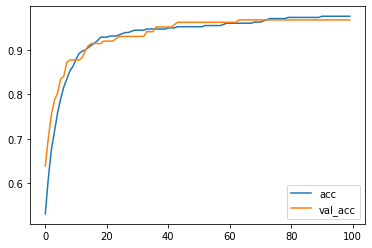

In [19]:
#plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();